In [ ]:
### Package Importation
import numpy as np
import pandas as pd
import json
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
import requests
import io
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#Twitter API Credentials
consumer_key = 
consumer_secret = 
access_token = 
access_secret = 

In [6]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

## Gather

### Given File about @dog_rates

In [652]:
dftweet = pd.read_csv('twitter-archive-enhanced.csv')

In [653]:
dftweet.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Image Recognition Data

In [4]:
image_predictions = 'https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5bf60c69_image-predictions-3/image-predictions-3.tsv'
p = requests.get(image_predictions)
open('image_predictions.tsv','wb').write(p.content)

335079

In [654]:
dfimg = pd.read_csv('image_predictions.tsv', sep='\t')

In [655]:
dfimg.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Twitter API Data

In [14]:
tweet_ids = np.unique(dfimg.tweet_id.append(dftweet.tweet_id))

In [15]:
len(tweet_ids)

2356

In [16]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 666020888022790149
Success
2: 666029285002620928
Success
3: 666033412701032449
Success
4: 666044226329800704
Success
5: 666049248165822465
Success
6: 666050758794694657
Success
7: 666051853826850816
Success
8: 666055525042405380
Success
9: 666057090499244032
Success
10: 666058600524156928
Success
11: 666063827256086533
Success
12: 666071193221509120
Success
13: 666073100786774016
Success
14: 666082916733198337
Success
15: 666094000022159362
Success
16: 666099513787052032
Success
17: 666102155909144576
Success
18: 666104133288665088
Success
19: 666268910803644416
Success
20: 666273097616637952
Success
21: 666287406224695296
Success
22: 666293911632134144
Success
23: 666337882303524864
Success
24: 666345417576210432
Success
25: 666353288456101888
Success
26: 666362758909284353
Success
27: 666373753744588802
Success
28: 666396247373291520
Success
29: 666407126856765440
Success
30: 666411507551481857
Success
31: 666418789513326592
Success
32: 666421158376562688
Success
33: 6664282763494

In [656]:
with open('tweet_json.txt') as f:
    listapi = []
    for tweet in f:
        listapi.append(json.loads(tweet))

In [657]:
dfapi = pd.DataFrame(listapi)

In [658]:
dfapi.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Sun Nov 15 22:32:08 +0000 2015,666020888022790149,666020888022790149,Here we have a Japanese Irish Setter. Lost eye...,False,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Sun Nov 15 23:05:30 +0000 2015,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,666033412701032449,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
3,Mon Nov 16 00:04:52 +0000 2015,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
4,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN


### Assess the files

### dftweet

In [659]:
dftweet.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Visual Assessment

#### Programatic Assessment

In [660]:
dftweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [661]:
dftweet.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [662]:
len(dftweet.tweet_id.unique()) == dftweet.tweet_id.nunique()

True

In [663]:
dftweet[dftweet['in_reply_to_status_id'].notnull()].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [664]:
dftweet['in_reply_to_status_id'][30]

8.862663570751283e+17

In [665]:
dftweet[dftweet['in_reply_to_user_id'].notnull()].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [666]:
dftweet['in_reply_to_user_id'][55]

47384430.0

In [667]:
dftweet['timestamp'].value_counts()

2016-01-28 21:54:41 +0000    1
2016-01-12 16:25:26 +0000    1
2016-02-27 17:24:05 +0000    1
2016-05-27 15:58:54 +0000    1
2015-12-21 22:15:18 +0000    1
                            ..
2016-01-08 03:50:03 +0000    1
2015-12-23 18:25:38 +0000    1
2016-06-04 00:01:35 +0000    1
2016-06-09 19:52:53 +0000    1
2016-10-02 23:23:04 +0000    1
Name: timestamp, Length: 2356, dtype: int64

In [668]:
dftweet['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [669]:
dftweet['text'].value_counts()

This is Winnie. She's h*ckin ferocious. Dandelion doesn't even see her coming. 12/10 would pet with caution https://t.co/EFfLCP7oQv              1
"🎶 DO YOU BELIEVE IN LIFE AFTER LOVE 🎶"\n11/10 https://t.co/URNs5zFskc                                                                           1
Say hello to William. He makes fun of others because he's terrified of his own deep-seated insecurities. 7/10 https://t.co/bwuV6FlRxr            1
This is a dog swinging. I really enjoyed it so I hope you all do as well. 11/10 https://t.co/Ozo9KHTRND                                          1
I WAS SENT THE ACTUAL DOG IN THE PROFILE PIC BY HIS OWNER THIS IS SO WILD. 14/10 ULTIMATE LEGEND STATUS https://t.co/7oQ1wpfxIH                  1
                                                                                                                                                ..
Meet Gerbald. He just found out he's adopted. Poor pupper. Snazzy tongue tho. 11/10 would hold close in time of need h

In [670]:
dftweet[dftweet['retweeted_status_id'].notnull()].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None


In [671]:
dftweet['retweeted_status_id'][19]

8.874739571039519e+17

In [672]:
dftweet[dftweet['retweeted_status_user_id'].notnull()].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None


In [673]:
dftweet['retweeted_status_user_id'][32]

19607400.0

In [674]:
dftweet[dftweet['retweeted_status_timestamp'].notnull()].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None


In [675]:
dftweet[dftweet['retweeted_status_timestamp'].notnull()]['retweeted_status_timestamp'].value_counts()

2015-12-08 18:17:56 +0000    1
2017-05-02 00:04:57 +0000    1
2016-08-08 17:19:51 +0000    1
2016-11-19 19:55:41 +0000    1
2016-09-27 02:53:48 +0000    1
                            ..
2016-09-09 18:31:54 +0000    1
2017-02-24 23:04:14 +0000    1
2015-12-23 00:45:35 +0000    1
2017-02-02 01:01:21 +0000    1
2016-10-02 23:23:04 +0000    1
Name: retweeted_status_timestamp, Length: 181, dtype: int64

In [676]:
dftweet['expanded_urls'].astype(str).str[:37].value_counts()

https://twitter.com/dog_rates/status/    2099
nan                                        59
http://us.blastingnews.com/news/2017/       3
https://www.gofundme.com/lolas-life-s       2
https://www.gofundme.com/helpquinny,h       2
                                         ... 
https://vine.co/v/iKIwAzEatd6               1
https://vine.co/v/5rt6T3qm7hL               1
https://vine.co/v/5QWd3LZqXxd               1
https://twitter.com/deadspin/status/8       1
https://vine.co/v/ixHYvdxUx1L               1
Name: expanded_urls, Length: 183, dtype: int64

In [677]:
(dftweet['expanded_urls'].astype(str).str[37:55] == dftweet['tweet_id'].astype(str)).value_counts()

True     1966
False     390
dtype: int64

In [678]:
dftweet['tweet_id'][0]

892420643555336193

In [679]:
dftweet['expanded_urls'].astype(str).str[55:].value_counts().head()

/photo/1                                                                                                                                                                                                    1452
                                                                                                                                                                                                             164
/video/1                                                                                                                                                                                                      78
/photo/1,https://twitter.com/dog_rates/status/791406955684368384/photo/1,https://twitter.com/dog_rates/status/791406955684368384/photo/1,https://twitter.com/dog_rates/status/791406955684368384/photo/1       2
/photo/1,https://twitter.com/dog_rates/status/771380798096281600/photo/1,https://twitter.com/dog_rates/status/771380798096281600/photo/1,https://twitter.com/dog_rat

In [680]:
dftweet['rating_numerator'].describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

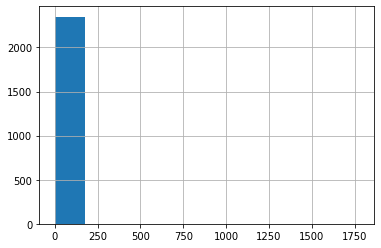

In [681]:
dftweet['rating_numerator'].hist()

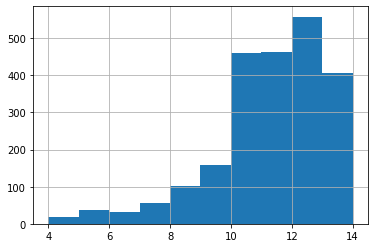

In [682]:
dftweet['rating_numerator'][dftweet['rating_numerator'].between(dftweet['rating_numerator'].quantile(.02), dftweet['rating_numerator'].quantile(.98))].hist()

In [683]:
dftweet['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [684]:
dftweet['rating_denominator'].describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

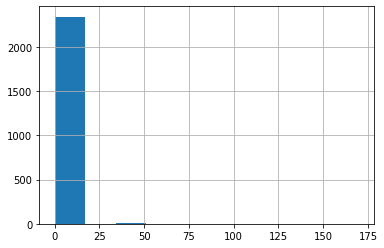

In [685]:
dftweet['rating_denominator'].hist()

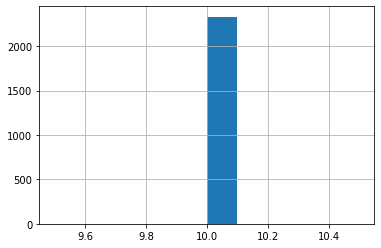

In [686]:
dftweet['rating_denominator'][dftweet['rating_denominator'].between(dftweet['rating_denominator'].quantile(.02), dftweet['rating_denominator'].quantile(.98))].hist()

In [687]:
dftweet['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [688]:
dftweet['name'].nunique()

957

In [689]:
dftweet['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [690]:
dftweet['name'].value_counts()

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
          ... 
Clyde        1
Bradley      1
Striker      1
Harlso       1
Ralphie      1
Name: name, Length: 957, dtype: int64

In [691]:
dftweet[['doggo','floofer','pupper','puppo']].head()

,doggo,floofer,pupper,puppo
0,None,None,None,None
1,None,None,None,None
2,None,None,None,None
3,None,None,None,None
4,None,None,None,None


In [692]:
dftweet['doggo'].value_counts()[1]/dftweet['tweet_id'].count()

0.041171477079796265

In [693]:
dftweet['floofer'].value_counts()[1]/dftweet['tweet_id'].count()

0.004244482173174873

In [694]:
dftweet['pupper'].value_counts()[1]/dftweet['tweet_id'].count()

0.10908319185059423

In [695]:
dftweet['puppo'].value_counts()[1]/dftweet['tweet_id'].count()

0.012733446519524618

#### Programatic Assessment

### dfimg

In [696]:
dfimg.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Visual Assessment

#### Programatic Assessment

In [697]:
dfimg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [698]:
dfimg['tweet_id'].count() == dfimg['tweet_id'].nunique()

True

In [699]:
dfimg['jpg_url'].value_counts()

https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg                                            2
https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg                                            2
https://pbs.twimg.com/media/Ct72q9jWcAAhlnw.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/817423809049493505/pu/img/5OFW0yueFu9oTUiQ.jpg    2
https://pbs.twimg.com/media/CtKHLuCWYAA2TTs.jpg                                            2
                                                                                          ..
https://pbs.twimg.com/media/Cfu1KSRXEAACC5X.jpg                                            1
https://pbs.twimg.com/media/Cf9tuHUWsAAHSrV.jpg                                            1
https://pbs.twimg.com/media/CVWGMQMWUAA7aOM.jpg                                            1
https://pbs.twimg.com/media/CWjQm5gXAAA9GkD.jpg                                            1
https://pbs.twimg.com/media/CWomSU_XIAAUYiK.jpg                       

In [700]:
dfimg[dfimg['jpg_url'].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


In [701]:
dfimg[dfimg['img_num']!=1]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
144,668623201287675904,https://pbs.twimg.com/media/CUdtP1xUYAIeBnE.jpg,4,Chihuahua,0.708163,True,Pomeranian,0.091372,True,titi,0.067325,False
312,671547767500775424,https://pbs.twimg.com/media/CVHRIiqWEAAj98K.jpg,2,Loafer,0.255088,False,platypus,0.090019,False,cowboy_boot,0.066536,False
315,671735591348891648,https://pbs.twimg.com/media/CVJ79MzW4AEpTom.jpg,2,stone_wall,0.271121,False,Irish_wolfhound,0.063078,True,poncho,0.048226,False
319,671768281401958400,https://pbs.twimg.com/media/CVKZsHtWwAA6gPj.jpg,2,Chihuahua,0.500373,True,French_bulldog,0.112796,True,Italian_greyhound,0.062893,True
345,672272411274932228,https://pbs.twimg.com/media/CVRkLuJWUAAhhYp.jpg,2,pug,0.914685,True,Norwegian_elkhound,0.014982,True,Siamese_cat,0.009221,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2051,887473957103951883,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2056,888554962724278272,https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg,3,Siberian_husky,0.700377,True,Eskimo_dog,0.166511,True,malamute,0.111411,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True


In [702]:
dfimg['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [703]:
dfimg['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
dhole                   1
alp                     1
lawn_mower              1
hare                    1
restaurant              1
Name: p1, Length: 378, dtype: int64

In [704]:
dfimg['p1_conf'].describe()

count    2075.000000
mean        0.594548
std         0.271174
min         0.044333
25%         0.364412
50%         0.588230
75%         0.843855
max         1.000000
Name: p1_conf, dtype: float64

In [705]:
dfimg['p1_dog'].describe()

count     2075
unique       2
top       True
freq      1532
Name: p1_dog, dtype: object

In [706]:
dfimg['p2'].value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
shower_curtain          1
white_wolf              1
soccer_ball             1
umbrella                1
racket                  1
Name: p2, Length: 405, dtype: int64

In [707]:
dfimg['p2_conf'].describe()

count    2.075000e+03
mean     1.345886e-01
std      1.006657e-01
min      1.011300e-08
25%      5.388625e-02
50%      1.181810e-01
75%      1.955655e-01
max      4.880140e-01
Name: p2_conf, dtype: float64

In [708]:
dfimg['p2_dog'].describe()

count     2075
unique       2
top       True
freq      1553
Name: p2_dog, dtype: object

In [709]:
dfimg['p3'].value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
binder                 1
soccer_ball            1
go-kart                1
quill                  1
boathouse              1
Name: p3, Length: 408, dtype: int64

In [710]:
dfimg['p3_conf'].describe()

count    2.075000e+03
mean     6.032417e-02
std      5.090593e-02
min      1.740170e-10
25%      1.622240e-02
50%      4.944380e-02
75%      9.180755e-02
max      2.734190e-01
Name: p3_conf, dtype: float64

In [711]:
dfimg['p3_dog'].describe()

count     2075
unique       2
top       True
freq      1499
Name: p3_dog, dtype: object

In [712]:
dfimg[(dfimg['p1_dog'] == False) & (dfimg['p2_dog'] == False) & (dfimg['p3_dog'] == False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


### dfapi

In [713]:
dfapi.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Sun Nov 15 22:32:08 +0000 2015,666020888022790149,666020888022790149,Here we have a Japanese Irish Setter. Lost eye...,False,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Sun Nov 15 23:05:30 +0000 2015,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,666033412701032449,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
3,Mon Nov 16 00:04:52 +0000 2015,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
4,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN


In [714]:
#Exported to more easily see what is in the columns in Excel
dfapi.to_csv('dfapi.csv', index=False)

In [715]:
# Realizing that Excel was still having trouble loading everything
dfapi.drop(['entities','extended_entities', 'user'],axis=1).head(50).to_csv('dfapi50.csv', index=False)

#### Visual Assessment

#### Programatic Assessment

In [716]:
dfapi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
created_at                       2331 non-null object
id                               2331 non-null int64
id_str                           2331 non-null object
full_text                        2331 non-null object
truncated                        2331 non-null bool
display_text_range               2331 non-null object
entities                         2331 non-null object
extended_entities                2059 non-null object
source                           2331 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null object
in_reply_to_screen_name          77 non-null object
user                             2331 non-null object
geo                              0 non-null object
coordinates                      0 non-null

In [717]:
dfapi['created_at'].value_counts()

Mon Mar 14 16:02:49 +0000 2016    1
Sat Nov 28 01:18:21 +0000 2015    1
Thu Mar 10 01:24:13 +0000 2016    1
Mon Nov 16 04:02:55 +0000 2015    1
Sun Dec 13 21:07:04 +0000 2015    1
                                 ..
Thu Dec 03 00:07:09 +0000 2015    1
Wed Mar 16 16:29:35 +0000 2016    1
Fri Feb 26 02:20:37 +0000 2016    1
Wed Dec 02 02:13:48 +0000 2015    1
Tue Feb 23 19:44:20 +0000 2016    1
Name: created_at, Length: 2331, dtype: int64

In [718]:
dfapi['created_at'].nunique()

2331

In [719]:
dfapi['id'].head()

0    666020888022790149
1    666029285002620928
2    666033412701032449
3    666044226329800704
4    666049248165822465
Name: id, dtype: int64

In [720]:
dfapi['id_str'].head()

0    666020888022790149
1    666029285002620928
2    666033412701032449
3    666044226329800704
4    666049248165822465
Name: id_str, dtype: object

In [721]:
(dfapi['id'].astype(str) == dfapi['id_str']).value_counts()

True    2331
dtype: int64

In [722]:
dfapi['full_text'].nunique()

2331

In [723]:
dfapi['full_text']

0       Here we have a Japanese Irish Setter. Lost eye...
1       This is a western brown Mitsubishi terrier. Up...
2       Here is a very happy pup. Big fan of well-main...
3       This is a purebred Piers Morgan. Loves to Netf...
4       Here we have a 1949 1st generation vulpix. Enj...
                              ...                        
2326    This is Franklin. He would like you to stop ca...
2327    This is Darla. She commenced a snooze mid meal...
2328    This is Archie. He is a rare Norwegian Pouncin...
2329    This is Tilly. She's just checking pup on you....
2330    This is Phineas. He's a mystical boy. Only eve...
Name: full_text, Length: 2331, dtype: object

In [724]:
dfapi['truncated'].value_counts()

False    2331
Name: truncated, dtype: int64

In [725]:
dfapi['display_text_range']

0       [0, 131]
1       [0, 139]
2       [0, 130]
3       [0, 137]
4       [0, 120]
          ...   
2326    [0, 138]
2327     [0, 79]
2328    [0, 121]
2329    [0, 138]
2330     [0, 85]
Name: display_text_range, Length: 2331, dtype: object

In [726]:
dfapi['full_text'][0]

'Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj'

In [727]:
dfapi['display_text_range'][0]

[0, 131]

In [728]:
dfapi['full_text'][0][0:131]

'Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj'

In [729]:
dfapi[dfapi['display_text_range'].astype(str).str[1:2] != "0"].head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
1274,Sat Jun 04 00:32:32 +0000 2016,738891149612572673,738891149612572673,@mount_alex3 13/10,False,"[13, 18]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",7.384119e+17,...,False,False,NaN,NaN,und,NaN,NaN,NaN,NaN,NaN
1495,Fri Aug 12 04:35:10 +0000 2016,763956972077010945,763956972077010945,@TheEllenShow I'm not sure if you know this bu...,False,"[14, 81]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",7.638652e+17,...,False,False,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN
1737,Fri Nov 11 19:55:50 +0000 2016,797165961484890113,797165961484890113,@JODYHiGHROLLER it may be an 11/10 but what do...,False,"[16, 55]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",7.971238e+17,...,False,False,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN
1772,Tue Nov 22 00:32:18 +0000 2016,800859414831898624,800859414831898624,@SkyWilliams doggo simply protecting you from ...,False,"[13, 105]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",8.008580e+17,...,False,False,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN
1919,Tue Jan 17 00:33:26 +0000 2017,821153421864615936,821153421864615936,@imgur for a polar bear tho I'd say 13/10 is a...,False,"[7, 56]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",8.211526e+17,...,False,False,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN


In [730]:
dfapi['full_text'][1494]

"This is Alfie. He's touching a butt. Couldn't be happier. 11/10 https://t.co/gx3xF5mZbo"

In [731]:
dfapi['display_text_range'][1494]

[0, 63]

In [732]:
dfapi['full_text'][1494][14:81]

" He's touching a butt. Couldn't be happier. 11/10 https://t.co/gx3x"

In [733]:
dfapi['entities'][0]

{'hashtags': [],
 'symbols': [],
 'user_mentions': [],
 'urls': [],
 'media': [{'id': 666020881337073664,
   'id_str': '666020881337073664',
   'indices': [108, 131],
   'media_url': 'http://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg',
   'url': 'https://t.co/BLDqew2Ijj',
   'display_url': 'pic.twitter.com/BLDqew2Ijj',
   'expanded_url': 'https://twitter.com/dog_rates/status/666020888022790149/photo/1',
   'type': 'photo',
   'sizes': {'medium': {'w': 960, 'h': 720, 'resize': 'fit'},
    'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'large': {'w': 960, 'h': 720, 'resize': 'fit'},
    'small': {'w': 680, 'h': 510, 'resize': 'fit'}}}]}

In [734]:
dfapi['entities'][0]['media'][0]['expanded_url']

'https://twitter.com/dog_rates/status/666020888022790149/photo/1'

In [735]:
dfapi['extended_entities'][0]

{'media': [{'id': 666020881337073664,
   'id_str': '666020881337073664',
   'indices': [108, 131],
   'media_url': 'http://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg',
   'url': 'https://t.co/BLDqew2Ijj',
   'display_url': 'pic.twitter.com/BLDqew2Ijj',
   'expanded_url': 'https://twitter.com/dog_rates/status/666020888022790149/photo/1',
   'type': 'photo',
   'sizes': {'medium': {'w': 960, 'h': 720, 'resize': 'fit'},
    'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'large': {'w': 960, 'h': 720, 'resize': 'fit'},
    'small': {'w': 680, 'h': 510, 'resize': 'fit'}}}]}

In [736]:
dfapi['extended_entities'][0]['media'][0]['sizes']['small']['w']

680

In [737]:
dfapi['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2197
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [738]:
dfapi[dfapi['in_reply_to_status_id'].notnull()]['in_reply_to_status_id']

57      6.670655e+17
166     6.689207e+17
186     6.678065e+17
206     6.693544e+17
317     6.715449e+17
            ...     
2188    8.634256e+17
2221    8.707262e+17
2267    8.795538e+17
2276    8.816070e+17
2301    8.862664e+17
Name: in_reply_to_status_id, Length: 77, dtype: float64

In [739]:
dfapi['in_reply_to_status_id'][57]

6.670655355705508e+17

In [740]:
dfapi['in_reply_to_status_id_str'][57]

'667065535570550784'

In [741]:
(dfapi['in_reply_to_status_id'].astype(str) == dfapi['in_reply_to_status_id_str']).value_counts()

False    2331
dtype: int64

In [742]:
(dfapi['in_reply_to_status_id'].astype(str).str[2:15] == dfapi['in_reply_to_status_id_str'].str[1:14]).value_counts()

False    2254
True       77
dtype: int64

In [743]:
dfapi['in_reply_to_user_id'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: in_reply_to_user_id, dtype: float64

In [744]:
dfapi[dfapi['in_reply_to_user_id'].notnull()]['in_reply_to_user_id'].head()

57     4.196984e+09
166    2.143566e+07
186    4.196984e+09
206    4.196984e+09
317    4.196984e+09
Name: in_reply_to_user_id, dtype: float64

In [745]:
dfapi[dfapi['in_reply_to_user_id_str'].notnull()]['in_reply_to_user_id_str'].head()

57     4196983835
166      21435658
186    4196983835
206    4196983835
317    4196983835
Name: in_reply_to_user_id_str, dtype: object

In [746]:
dfapi[dfapi['in_reply_to_user_id'].notnull()]['in_reply_to_user_id'].astype(str).str[:-2]

57      4196983835
166       21435658
186     4196983835
206     4196983835
317     4196983835
           ...    
2188      77596200
2221      16487760
2267    3105440746
2276      47384430
2301    2281181600
Name: in_reply_to_user_id, Length: 77, dtype: object

In [747]:
(dfapi[dfapi['in_reply_to_user_id_str'].notnull()]['in_reply_to_user_id_str'] == dfapi[dfapi['in_reply_to_user_id'].notnull()]['in_reply_to_user_id'].astype(str).str[:-2]).value_counts()

True     75
False     2
dtype: int64

In [748]:
dfapi[dfapi['in_reply_to_screen_name'].notnull()]['in_reply_to_screen_name'].value_counts()

dog_rates          47
markhoppus          2
mount_alex3         1
0_kelvin_0          1
roushfenway         1
serial              1
NBCSports           1
wane15              1
ABC                 1
JODYHiGHROLLER      1
RealKentMurphy      1
Marc_IRL            1
ComplicitOwl        1
Jack_Septic_Eye     1
SweetsyPeets        1
CommonWhiteGirI     1
docmisterio         1
NonWhiteHat         1
jonnysun            1
HistoryInPics       1
ABC7                1
dhmontgomery        1
TheEllenShow        1
spaghemily          1
UNC                 1
shibbnbot           1
imgur               1
LightningHoltt      1
SkyWilliams         1
s8n                 1
Name: in_reply_to_screen_name, dtype: int64

In [749]:
dfapi['user'][0]

{'id': 4196983835,
 'id_str': '4196983835',
 'name': 'WeRateDogs®',
 'screen_name': 'dog_rates',
 'location': '「 DM YOUR DOGS 」',
 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➪ WeRateDogs partnerships@weratedogs.com ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀',
 'url': 'https://t.co/N7sNNHAEXS',
 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS',
     'expanded_url': 'http://weratedogs.com',
     'display_url': 'weratedogs.com',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 8762885,
 'friends_count': 15,
 'listed_count': 7230,
 'created_at': 'Sun Nov 15 21:41:29 +0000 2015',
 'favourites_count': 145410,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': True,
 'statuses_count': 11941,
 'lang': None,
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': '000000',
 'profile_background_image_url': 'http://abs.twimg.com/im

In [750]:
dfapi['user'][0]['entities']['url']['urls'][0]['url']

'https://t.co/N7sNNHAEXS'

In [751]:
dfapi['geo'].notnull().value_counts()

False    2331
Name: geo, dtype: int64

In [752]:
dfapi['coordinates'].notnull().value_counts()

False    2331
Name: coordinates, dtype: int64

In [753]:
dfapi[dfapi['place'].notnull()]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
1493,Wed Aug 10 01:23:03 +0000 2016,763183847194451968,763183847194451968,This is Clark. He collects teddy bears. It's a...,False,"[0, 102]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 763183833575481344, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN


In [754]:
dfapi[dfapi['place'].notnull()]['place'][1493]

{'id': '7356b662670b2c31',
 'url': 'https://api.twitter.com/1.1/geo/id/7356b662670b2c31.json',
 'place_type': 'city',
 'name': 'Clifton',
 'full_name': 'Clifton, NJ',
 'country_code': 'US',
 'country': 'United States',
 'contained_within': [],
 'bounding_box': {'type': 'Polygon',
  'coordinates': [[[-74.1977277, 40.82028],
    [-74.118533, 40.82028],
    [-74.118533, 40.899384],
    [-74.1977277, 40.899384]]]},
 'attributes': {}}

In [755]:
dfapi['place'][1493]['bounding_box']['coordinates'][0][0]

[-74.1977277, 40.82028]

In [756]:
dfapi['contributors'].notnull().value_counts()

False    2331
Name: contributors, dtype: int64

In [757]:
dfapi['is_quote_status'].value_counts()

False    2300
True       31
Name: is_quote_status, dtype: int64

In [758]:
dfapi['retweet_count'].describe()

count     2331.000000
mean      2718.826255
std       4598.851488
min          1.000000
25%        549.000000
50%       1275.000000
75%       3157.500000
max      78280.000000
Name: retweet_count, dtype: float64

In [759]:
dfapi['favorite_count'].describe()

count      2331.000000
mean       7600.390390
std       11792.492855
min           0.000000
25%        1327.000000
50%        3310.000000
75%        9313.000000
max      157122.000000
Name: favorite_count, dtype: float64

In [760]:
dfapi['favorited'].value_counts()

False    2331
Name: favorited, dtype: int64

In [761]:
dfapi['retweeted'].value_counts()

False    2331
Name: retweeted, dtype: int64

In [762]:
dfapi['possibly_sensitive'].value_counts()

False    2196
Name: possibly_sensitive, dtype: int64

In [763]:
dfapi['possibly_sensitive_appealable'].value_counts()

False    2196
Name: possibly_sensitive_appealable, dtype: int64

In [764]:
dfapi['lang'].value_counts()

en     2313
und       7
nl        3
in        3
ro        1
eu        1
et        1
es        1
tl        1
Name: lang, dtype: int64

In [765]:
dfapi[dfapi['retweeted_status'].notnull()]['retweeted_status']

95      {'created_at': 'Fri Nov 20 03:41:59 +0000 2015...
96      {'created_at': 'Fri Nov 20 03:43:06 +0000 2015...
1112    {'created_at': 'Mon Mar 21 19:29:52 +0000 2016...
1311    {'created_at': 'Thu Nov 19 00:32:12 +0000 2015...
1331    {'created_at': 'Sat Nov 21 00:46:50 +0000 2015...
                              ...                        
2257    {'created_at': 'Tue Nov 24 03:51:38 +0000 2015...
2258    {'created_at': 'Fri Jun 23 16:00:04 +0000 2017...
2263    {'created_at': 'Fri Jun 23 01:10:23 +0000 2017...
2295    {'created_at': 'Sun Feb 12 01:04:29 +0000 2017...
2299    {'created_at': 'Sat Jul 15 02:44:07 +0000 2017...
Name: retweeted_status, Length: 163, dtype: object

In [766]:
dfapi['retweeted_status'][95]

{'created_at': 'Fri Nov 20 03:41:59 +0000 2015',
 'id': 667548415174144001,
 'id_str': '667548415174144001',
 'full_text': 'Unoriginal idea. Blatant plagiarism. Curious grammar. -5/10 https://t.co/r7XzeQZWzb',
 'truncated': False,
 'display_text_range': [0, 83],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 667548406944960512,
    'id_str': '667548406944960512',
    'indices': [60, 83],
    'media_url': 'http://pbs.twimg.com/media/CUObvUJVEAAnYPF.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/CUObvUJVEAAnYPF.jpg',
    'url': 'https://t.co/r7XzeQZWzb',
    'display_url': 'pic.twitter.com/r7XzeQZWzb',
    'expanded_url': 'https://twitter.com/dogratingrating/status/667548415174144001/photo/1',
    'type': 'photo',
    'sizes': {'small': {'w': 382, 'h': 680, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'large': {'w': 575, 'h': 1024, 'resize': 'fit'},
     'medium': {'w': 575, 'h': 1024, 'res

In [767]:
dfapi['retweeted_status'][95]['extended_entities']['media'][0]['id']

667548406944960512

In [768]:
dfapi[dfapi['quoted_status_id'].notnull()]['quoted_status_id']

1030    7.061659e+17
1117    7.099191e+17
1154    7.166371e+17
1200    7.251361e+17
1314    6.721083e+17
1460    7.591676e+17
1543    7.719056e+17
1672    7.888183e+17
1728    7.961237e+17
1796    8.044179e+17
1808    8.065709e+17
1888    8.179021e+17
1942    8.239662e+17
2010    8.322683e+17
2059    8.389487e+17
2073    8.413114e+17
2096    8.460885e+17
2098    8.464848e+17
2146    8.556564e+17
2203    8.664587e+17
2224    8.710758e+17
2243    8.744134e+17
2248    8.761630e+17
2259    8.785999e+17
2289    8.839657e+17
2299    8.860534e+17
Name: quoted_status_id, dtype: float64

In [769]:
dfapi[dfapi['quoted_status_id_str'].notnull()]['quoted_status_id_str']

1030    706165920809492480
1117    709919141004595201
1154    716637124322177024
1200    725136065078521856
1314    672108316018024452
1460    759167558763196416
1543    771905568600719360
1672    788818328538099712
1728    796123679771897856
1796    804417859124273152
1808    806570933175652352
1888    817902080979599361
1942    823966201328046080
2010    832268302944579584
2059    838948714227998720
2073    841311395547250688
2096    846088479142531073
2098    846484798663245829
2146    855656431005061120
2203    866458718883467265
2224    871075758080503809
2243    874413398133547008
2248    876162994446753793
2259    878599868507402241
2289    883965650754039809
2299    886053434075471873
Name: quoted_status_id_str, dtype: object

In [770]:
(dfapi['quoted_status_id'].astype(str).str[2:16] == dfapi['quoted_status_id_str'].str[1:15]).value_counts()

False    2305
True       26
dtype: int64

In [771]:
dfapi[dfapi['quoted_status_permalink'].notnull()]['quoted_status_permalink']

1030    {'url': 'https://t.co/WN4C6miCzR', 'expanded':...
1117    {'url': 'https://t.co/kJIMNyMNKV', 'expanded':...
1154    {'url': 'https://t.co/Juid3nnLbC', 'expanded':...
1200    {'url': 'https://t.co/BHICimO58W', 'expanded':...
1314    {'url': 'https://t.co/RNqS7C4Y4N', 'expanded':...
1460    {'url': 'https://t.co/fRaTGcj68A', 'expanded':...
1543    {'url': 'https://t.co/yOVzAomJ6k', 'expanded':...
1672    {'url': 'https://t.co/G2ms0A5jWM', 'expanded':...
1728    {'url': 'https://t.co/a18mzkhTf6', 'expanded':...
1796    {'url': 'https://t.co/LEZ8jR5txd', 'expanded':...
1808    {'url': 'https://t.co/QrFkqgHR1G', 'expanded':...
1888    {'url': 'https://t.co/bbuKxk0fM8', 'expanded':...
1942    {'url': 'https://t.co/50qq2DItPW', 'expanded':...
2010    {'url': 'https://t.co/8YlD5lxPbQ', 'expanded':...
2059    {'url': 'https://t.co/ngAxYLVYHP', 'expanded':...
2073    {'url': 'https://t.co/cEORXhwZ5K', 'expanded':...
2096    {'url': 'https://t.co/4ctgpGcqAd', 'expanded':...
2098    {'url'

In [772]:
dfapi['quoted_status_permalink'][1030]

{'url': 'https://t.co/WN4C6miCzR',
 'expanded': 'https://twitter.com/wgnnews/status/706165920809492480',
 'display': 'twitter.com/wgnnews/status…'}

In [773]:
dfapi['quoted_status'][1030]

{'created_at': 'Sat Mar 05 17:14:10 +0000 2016',
 'id': 706165920809492480,
 'id_str': '706165920809492480',
 'full_text': 'Dog gets behind wheel of semi, crashes into tree and parked car in Minnesota https://t.co/KygFwGfIpE https://t.co/ky2Qyz7bFC',
 'truncated': False,
 'display_text_range': [0, 124],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/KygFwGfIpE',
    'expanded_url': 'http://via.wgntv.com/tXVrG',
    'display_url': 'via.wgntv.com/tXVrG',
    'indices': [77, 100]}],
  'media': [{'id': 706165920281075712,
    'id_str': '706165920281075712',
    'indices': [101, 124],
    'media_url': 'http://pbs.twimg.com/media/CczOKb7XIAAsMtv.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/CczOKb7XIAAsMtv.jpg',
    'url': 'https://t.co/ky2Qyz7bFC',
    'display_url': 'pic.twitter.com/ky2Qyz7bFC',
    'expanded_url': 'https://twitter.com/WGNNews/status/706165920809492480/photo/1',
    'type': 'photo',
    'sizes': {'thumb': 

In [774]:
dfapi['quoted_status'][1030]['entities']['media'][0]['sizes']['small']

{'w': 555, 'h': 313, 'resize': 'fit'}

### Clean the files

#### Define: 
Make a copy of the files

#### Code

In [775]:
dftweetorig = dftweet.copy()

In [776]:
dfimgorig = dfimg.copy()

In [777]:
dfapiorig = dfapi.copy()

#### Test

In [778]:
dftweet.equals(dftweetorig)

True

In [779]:
dfimg.equals(dfimgorig)

True

In [780]:
dfapi.equals(dfapiorig)

True

#### Define:
Tidiness: Remove retweets from dftweet

#### Code:

In [781]:
dftweet = dftweet[~dftweet['in_reply_to_status_id'].notnull()]

#### Test:

In [782]:
dftweet[dftweet['in_reply_to_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define: 
Tidiness: Remove the unnecessary columns from dftweet

In [783]:
dftweet.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Code:

In [784]:
dftweet.drop(['in_reply_to_status_id','in_reply_to_user_id','source','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'],axis=1, inplace=True)

#### Test:

In [785]:
dftweet.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


#### Define:
Tidiness: Remove retweets from dfapi

#### Code:

In [786]:
dfapi = dfapi[~dfapi['in_reply_to_status_id'].notnull()]

#### Test:

In [787]:
dfapi[dfapi['in_reply_to_status_id'].notnull()]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status


#### Define:
Tidiness: Remove retweets from dfapi (those beginning with 'RT')

#### Code:

In [788]:
dfapi[dfapi['full_text'].astype(str).str[:2] == 'RT'].head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
95,Fri Nov 20 03:51:47 +0000 2015,667550882905632768,667550882905632768,RT @dogratingrating: Unoriginal idea. Blatant ...,False,"[0, 104]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667548406944960512, 'id_str'...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,...,False,False,False,False,ro,{'created_at': 'Fri Nov 20 03:41:59 +0000 2015...,NaN,NaN,NaN,NaN
96,Fri Nov 20 03:51:52 +0000 2015,667550904950915073,667550904950915073,RT @dogratingrating: Exceptional talent. Origi...,False,"[0, 123]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667548685090197504, 'id_str'...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,...,False,False,False,False,en,{'created_at': 'Fri Nov 20 03:43:06 +0000 2015...,NaN,NaN,NaN,NaN
495,Sat Dec 12 01:38:53 +0000 2015,675489971617296384,675489971617296384,RT until we find this dog. Clearly a cool dog ...,False,"[0, 136]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 675489960972165120, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1068,Fri Mar 11 21:15:02 +0000 2016,708400866336894977,708400866336894977,RT if you are as ready for summer as this pup ...,False,"[0, 78]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1112,Mon Mar 21 19:31:59 +0000 2016,711998809858043904,711998809858043904,RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,False,"[0, 97]","{'hashtags': [{'text': 'LoveTwitter', 'indices...","{'media': [{'id': 711998175234510848, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,{'created_at': 'Mon Mar 21 19:29:52 +0000 2016...,NaN,NaN,NaN,NaN


In [789]:
dfapi = dfapi[dfapi['full_text'].astype(str).str[:2] != 'RT']

#### Test:

In [790]:
dfapi[dfapi['full_text'].astype(str).str[:2] == 'RT']

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status


#### Define:
Tidiness: Remove the unnecessary columns from dfapi

In [791]:
dfapi.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Sun Nov 15 22:32:08 +0000 2015,666020888022790149,666020888022790149,Here we have a Japanese Irish Setter. Lost eye...,False,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Sun Nov 15 23:05:30 +0000 2015,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,666033412701032449,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
3,Mon Nov 16 00:04:52 +0000 2015,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
4,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN


#### Code:

In [792]:
dfapi.drop(['id_str', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_status'], axis=1, inplace=True)

#### Test:

In [793]:
dfapi.head()

,created_at,id,full_text,retweet_count,favorite_count
0,Sun Nov 15 22:32:08 +0000 2015,666020888022790149,Here we have a Japanese Irish Setter. Lost eye...,465,2422
1,Sun Nov 15 23:05:30 +0000 2015,666029285002620928,This is a western brown Mitsubishi terrier. Up...,42,121
2,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,Here is a very happy pup. Big fan of well-main...,41,113
3,Mon Nov 16 00:04:52 +0000 2015,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,133,274
4,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,41,97


#### Define:
Tidiness: Add dog_stage columns for dfapi

#### Code:

In [794]:
dfapi['dog_stage'] = dfapi['full_text'].str.extract('(doggo|floofer|pupper|puppo)', expand=True)

#### Test:

In [795]:
dfapi.loc[[0,1150,1332,214,1271]]

,created_at,id,full_text,retweet_count,favorite_count,dog_stage
0,Sun Nov 15 22:32:08 +0000 2015,666020888022790149,Here we have a Japanese Irish Setter. Lost eye...,465,2422,NaN
1150,Sat Apr 02 01:52:38 +0000 2016,716080869887381504,Here's a super majestic doggo and a sunset 11/...,1903,6738,doggo
1332,Sat Jun 25 03:17:46 +0000 2016,746542875601690625,Here's a golden floofer helping with the groce...,1889,5067,floofer
214,Thu Nov 26 21:36:12 +0000 2015,669993076832759809,This is Zoey. Her dreams of becoming a hippo b...,81,314,pupper
1271,Fri Jun 03 01:07:16 +0000 2016,738537504001953792,This is Bayley. She fell asleep trying to esca...,1544,5101,puppo


#### Define:
Tidiness: Add dog_stage column for dftweet

#### Code:

In [796]:
dftweet['dog_stage'] = dftweet['text'].str.extract('(doggo|floofer|pupper|puppo)', expand=True)

In [797]:
dftweet.loc[[0,9,46,49,94]]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,NaN
9,890240255349198849,2017-07-26 15:59:51 +0000,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,None,None,None,doggo
46,883360690899218434,2017-07-07 16:22:55 +0000,Meet Grizzwald. He may be the floofiest floofe...,13,10,Grizzwald,None,floofer,None,None,floofer
49,882762694511734784,2017-07-06 00:46:41 +0000,This is Gus. He's quite the cheeky pupper. Alr...,12,10,Gus,None,None,pupper,None,pupper
94,874012996292530176,2017-06-11 21:18:31 +0000,This is Sebastian. He can't see all the colors...,13,10,Sebastian,None,None,None,puppo,puppo


#### Define:
Quality: Drop other doggo-lingo columns for dftweet

#### Code:

In [798]:
dftweet.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

In [799]:
dftweet.loc[[0,9,46,49,94]]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
9,890240255349198849,2017-07-26 15:59:51 +0000,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo
46,883360690899218434,2017-07-07 16:22:55 +0000,Meet Grizzwald. He may be the floofiest floofe...,13,10,Grizzwald,floofer
49,882762694511734784,2017-07-06 00:46:41 +0000,This is Gus. He's quite the cheeky pupper. Alr...,12,10,Gus,pupper
94,874012996292530176,2017-06-11 21:18:31 +0000,This is Sebastian. He can't see all the colors...,13,10,Sebastian,puppo


#### Define:
Tidiness: Extract base of rating_numerator and rating_denominator from full_text

#### Code:

In [800]:
dfapi[['pre','post']] = dfapi['full_text'].str.split('/', n=1, expand=True)

In [801]:
dfapi['before'] = dfapi.pre.str[-3:]
dfapi['after'] = dfapi.post.str[:3]

#### Test:

In [802]:
dfapi[['before','after']]

,before,after
0,. 8,10
1,. 7,10
2,. 9,10
3,. 6,10
4,. 5,10
...,...,...
2326,12,10
2327,13,10
2328,12,10
2329,13,10


#### Define:
Quality: Remove punctuation (except periods/decimal points) and letters from before

#### Code:

In [803]:
dfapi['before'].astype(str).str[:1].value_counts()

      1623
.      380
\n      15
1       10
t        7
e        7
?        7
s        5
l        4
o        4
y        3
)        3
h        2
"        2
3        2
d        2
g        2
c        2
r        2
4        1
2        1
a        1
f        1
(        1
p        1
7        1
Name: before, dtype: int64

In [804]:
dfapi['before'] = dfapi['before'].map(lambda x: x.lstrip(' ea?toslcf)yr;d"gp(\n'))

In [805]:
dfapi['before'].value_counts().tail(30)

5      2
3      2
88     1
45     1
.26    1
..8    1
60     1
420    1
24     1
3.5    1
144    1
121    1
       1
44     1
99     1
1      1
.27    1
204    1
.75    1
3 1    1
h 7    1
h 9    1
165    1
50     1
84     1
. 0    1
80     1
.13    1
776    1
w      1
Name: before, dtype: int64

In [806]:
dfapi['before'] = dfapi['before'].map(lambda x: x.lstrip(' wh'))

In [807]:
dfapi['before'].value_counts().head(50)

12     480
10     425
11     409
13     282
. 9    130
. 8     89
. 7     46
14      39
. 5     31
. 6     25
9       20
. 3     16
. 4     11
.10      9
8        8
6        7
7        6
4        5
. 2      5
.11      4
2        4
. 1      3
..9      3
         2
.12      2
5        2
3        2
.13      1
..8      1
420      1
121      1
144      1
44       1
3.5      1
24       1
88       1
60       1
45       1
.26      1
84       1
1        1
99       1
.27      1
204      1
.75      1
3 1      1
165      1
50       1
. 0      1
80       1
Name: before, dtype: int64

In [808]:
dfapi.before.replace('. 9','9', inplace=True)
dfapi.before.replace('. 8','8', inplace=True)
dfapi.before.replace('. 7','7', inplace=True)
dfapi.before.replace('. 6','6', inplace=True)
dfapi.before.replace('. 5','5', inplace=True)
dfapi.before.replace('. 4','4', inplace=True)
dfapi.before.replace('. 3','3', inplace=True)
dfapi.before.replace('. 2','2', inplace=True)
dfapi.before.replace('. 1','1', inplace=True)
dfapi.before.replace('. 0','0', inplace=True)

In [809]:
dfapi['before'].value_counts()

12     480
10     425
11     409
13     282
9      150
8       97
7       52
14      39
5       33
6       32
3       18
4       16
.10      9
2        9
.11      4
1        4
..9      3
.12      2
         2
420      1
.26      1
0        1
144      1
44       1
121      1
3.5      1
..8      1
88       1
60       1
45       1
204      1
80       1
165      1
99       1
.27      1
84       1
.13      1
.75      1
3 1      1
776      1
50       1
24       1
Name: before, dtype: int64

In [810]:
dfapi.before.replace('..9','9', inplace=True)
dfapi.before.replace('..8','8', inplace=True)

In [811]:
dfapi['before'].value_counts()

12     480
10     425
11     409
13     282
9      153
8       98
7       52
14      39
5       33
6       32
3       18
4       16
2        9
.10      9
1        4
.11      4
         2
.12      2
0        1
121      1
144      1
44       1
88       1
60       1
3.5      1
.26      1
45       1
.13      1
776      1
.27      1
204      1
165      1
.75      1
3 1      1
50       1
24       1
80       1
84       1
420      1
99       1
Name: before, dtype: int64

In [812]:
dfapi[dfapi['before'] == '.10']['full_text'].astype(str).str[-60:]

727     OTS ARE GREY DAMN IT CINDY" ...10/10 https://t...
1243    is is dog how may I assist" ...10/10 https://t...
1256    rely work a washing machine ...10/10 https://t...
1270    my son ever again" ...10/10 for both https://t...
1277    nly send in dogs. Thank you ...10/10 https://t...
1283    y rate dogs. Only send dogs ...10/10 https://t...
1345    aking the photos. Thank you ...10/10 https://t...
1366    is is @dog_rates. Thank you ...10/10 https://t...
1545    on it.10/10 would attempt to comfort https://t...
Name: full_text, dtype: object

In [813]:
dfapi[dfapi['before'] == '.11']['full_text'].astype(str).str[-50:]

1032    ill out the FAFSA ...11/10 https://t.co/qy33OB...
1337     know this by now ...11/10 https://t.co/9e48aP...
1339    e a real frighten ...11/10 https://t.co/DX1JUH...
1346    l sharks. Thank u ...11/10 https://t.co/Ie2mWX...
Name: full_text, dtype: object

In [814]:
dfapi[dfapi['before'] == '.12']['full_text'].astype(str).str[-50:]

1013     with no pickles" ...12/10 https://t.co/kQPVxq...
1088    d then collapses* ...12/10 https://t.co/BNdVZE...
Name: full_text, dtype: object

In [815]:
dfapi[dfapi['before'] == '.13']['full_text'].astype(str).str[40:]

1028    ng ovation.13/10 just magnificent (vid by @CSB...
Name: full_text, dtype: object

In [816]:
dfapi[dfapi['before'] == '.75']['full_text'].astype(str).str[-50:]

1653     H*ckin magical af 9.75/10 https://t.co/yBO5wu...
Name: full_text, dtype: object

In [817]:
dfapi[dfapi['before'] == '.26']['full_text'].astype(str).str[-50:]

642    ppers. Average of 11.26/10 https://t.co/eNm2S6...
Name: full_text, dtype: object

In [818]:
dfapi[dfapi['before'] == '.27']['full_text'].astype(str).str[-60:]

1586    he locals. 11.27/10 would smile back https://t...
Name: full_text, dtype: object

In [819]:
dfapi[dfapi['before'] == '3 1']['full_text'].astype(str).str[-50:]

20     Penis on the collar. 9/10 https://t.co/d9NcXF...
Name: full_text, dtype: object

In [820]:
dfapi.before.replace('.10','10', inplace=True)
dfapi.before.replace('.11','11', inplace=True)
dfapi.before.replace('.12','12', inplace=True)
dfapi.before.replace('.13','13', inplace=True)
dfapi.before.replace('.75','9.75', inplace=True)
dfapi.before.replace('.26','11.26', inplace=True)
dfapi.before.replace('.27','11.27', inplace=True)
dfapi.before.replace('3 1','9', inplace=True)

In [821]:
dfapi['before'].value_counts()

12       482
10       434
11       413
13       283
9        154
8         98
7         52
14        39
5         33
6         32
3         18
4         16
2          9
1          4
           2
420        1
776        1
0          1
121        1
144        1
44         1
88         1
60         1
3.5        1
11.26      1
11.27      1
45         1
99         1
204        1
165        1
84         1
9.75       1
24         1
50         1
80         1
Name: before, dtype: int64

In [822]:
dfapi[dfapi['before'] == '0']['full_text'].astype(str).str[-50:]

2029    orget what day it is. 0/10 https://t.co/YbEJPk...
Name: full_text, dtype: object

In [823]:
dfapi[dfapi['before'] == '420']['full_text'].astype(str).str[-50:]

281    you go.\n\nGood dogg. 420/10 https://t.co/yfAA...
Name: full_text, dtype: object

In [824]:
dfapi[dfapi['before'] == '99']['full_text'].astype(str).str[-60:]

1126    n a bench. 99/90 good work everybody https://t...
Name: full_text, dtype: object

In [825]:
dfapi[dfapi['before'] == '776']['full_text'].astype(str).str[-50:]

1375    simply America af. 1776/10 https://t.co/GRXwMx...
Name: full_text, dtype: object

In [826]:
dfapi[dfapi['before'] == '50']['full_text'].astype(str).str[60:]

1152    are split 50/50. Amazed af. 11/10 https://t.co...
Name: full_text, dtype: object

In [827]:
dfapi[dfapi['before'] == '144']['full_text'].astype(str).str[-50:]

576    otal of 144/120 ...I think https://t.co/ZanVtA...
Name: full_text, dtype: object

In [828]:
dfapi[dfapi['before'] == '44']['full_text'].astype(str).str[30:]

921    t of pups. 44/40 would pet all at once https:/...
Name: full_text, dtype: object

In [829]:
dfapi[dfapi['before'] == '24']['full_text'].astype(str).str[0:]

1831    Meet Sam. She smiles 24/7 &amp; secretly aspir...
Name: full_text, dtype: object

In [830]:
dfapi[dfapi['before'] == '24']

,created_at,id,full_text,retweet_count,favorite_count,dog_stage,pre,post,before,after
1831,Mon Dec 19 23:06:23 +0000 2016,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspir...,1471,5468,NaN,Meet Sam. She smiles 24,7 &amp; secretly aspires to be a reindeer. \nK...,24,7 &


In [831]:
dfapi['full_text'][1831]

'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'

In [832]:
dfapi[dfapi['before'] == '204']['full_text'].astype(str).str[40:]

1234    ved squad of doggos. 204/170 would try to pet ...
Name: full_text, dtype: object

In [833]:
dfapi[dfapi['before'] == '84']['full_text'].astype(str).str[40:]

1913    he floofs have been released. 84/70 https://t....
Name: full_text, dtype: object

In [834]:
dfapi[dfapi['before'] == '45']['full_text'].astype(str).str[-60:]

1080    mera is. 45/50 would hug all at once https://t...
Name: full_text, dtype: object

In [835]:
dfapi[dfapi['before'] == '165']['full_text'].astype(str).str[30:]

1451    my front door... 165/150 https://t.co/HmwrdfEfUE
Name: full_text, dtype: object

In [836]:
dfapi[dfapi['before'] == '121']['full_text'].astype(str).str[90:]

719    es. Clever puppers 121/110 https://t.co/1zfnTJ...
Name: full_text, dtype: object

In [837]:
dfapi[dfapi['before'] == '3.5']['full_text'].astype(str).str[90:]

2286    vorite monkey. 13.5/10 https://t.co/qjrljjt948
Name: full_text, dtype: object

In [838]:
dfapi[dfapi['before'] == '80']['full_text'].astype(str).str[60:]

1100    ever happens next. 80/80 https://t.co/0eb7R1Om12
Name: full_text, dtype: object

In [839]:
dfapi[dfapi['before'] == '60']['full_text'].astype(str).str[20:]

1003    k of puppers.  60/50 I'll take the lot https:/...
Name: full_text, dtype: object

In [840]:
dfapi[dfapi['before'] == '88']['full_text'].astype(str).str[20:]

512    re platoon of puppers. Total score: 88/80 woul...
Name: full_text, dtype: object

In [841]:
dfapi.before.replace('960','13', inplace=True)
dfapi.before.replace('776','1776', inplace=True)
dfapi.before.replace('50','11', inplace=True)
dfapi.before.replace('3.5','13.5', inplace=True)
dfapi.before.replace('24', np.nan, inplace=True)

In [842]:
dfapi['before'].value_counts()

12       482
10       434
11       414
13       283
9        154
8         98
7         52
14        39
5         33
6         32
3         18
4         16
2          9
1          4
           2
60         1
144        1
121        1
13.5       1
44         1
11.27      1
1776       1
88         1
420        1
45         1
204        1
99         1
165        1
84         1
0          1
9.75       1
80         1
11.26      1
Name: before, dtype: int64

In [843]:
dfapi[dfapi['before'] == ""]['full_text']

540     This is the saddest/sweetest/best picture I've...
1105    What hooligan sent in pictures w/out a dog in ...
Name: full_text, dtype: object

In [844]:
dfapi['full_text'][540]

"This is the saddest/sweetest/best picture I've been sent. 12/10 😢🐶 https://t.co/vQ2Lw1BLBF"

In [845]:
dfapi['full_text'][1105]

"What hooligan sent in pictures w/out a dog in them? Churlish af. 3/10 just bc that's a neat fluffy bean bag chair https://t.co/wcwoGOkZvz"

In [846]:
dfapi.loc[540, 'before'] = '12'
dfapi.loc[1105, 'before'] = '3'

In [847]:
dfapi['before'].value_counts()

12       483
10       434
11       414
13       283
9        154
8         98
7         52
14        39
5         33
6         32
3         19
4         16
2          9
1          4
45         1
121        1
13.5       1
84         1
144        1
1776       1
88         1
60         1
11.26      1
80         1
44         1
165        1
99         1
11.27      1
420        1
0          1
9.75       1
204        1
Name: before, dtype: int64

In [848]:
dfapi[dfapi['before'] == '1']['full_text'].astype(str).str[-50:]

17     ly quick. Shits eggs. 1/10 https://t.co/Asgdc6...
94     h. Not even cordless. 1/10 https://t.co/i9iSGN...
264    ing doesn't look fun. 1/10 https://t.co/jxukeh...
486    ecause that's a nice table https://t.co/RDXCfk...
Name: full_text, dtype: object

In [849]:
dfapi['full_text'][486]

"What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0"

#### Test:

In [850]:
dfapi['before'].value_counts()

12       483
10       434
11       414
13       283
9        154
8         98
7         52
14        39
5         33
6         32
3         19
4         16
2          9
1          4
45         1
121        1
13.5       1
84         1
144        1
1776       1
88         1
60         1
11.26      1
80         1
44         1
165        1
99         1
11.27      1
420        1
0          1
9.75       1
204        1
Name: before, dtype: int64

#### Define:
Quality: Remove punctuation (except periods/decimal points) and letters from after

#### Code:

In [851]:
dfapi['after'].astype(str).str[-1:].value_counts()

      2035
s       18
\n      10
.        8
,        7
0        5
&        2
t        1
e        1
!        1
l        1
Name: after, dtype: int64

In [852]:
dfapi['after'] = dfapi['after'].map(lambda x: x.rstrip(' s\n,&t!lre)!/'))

In [853]:
dfapi['after'].astype(str).str[-1:].value_counts()

0    2075
.       8
1       2
2       1
w       1
u       1
7       1
Name: after, dtype: int64

In [854]:
dfapi['after'] = dfapi['after'].map(lambda x: x.rstrip('wpu'))

In [855]:
dfapi['after'].astype(str).str[-1:].value_counts()

0    2075
.       8
1       2
2       1
o       1
s       1
7       1
Name: after, dtype: int64

In [856]:
dfapi['after'] = dfapi['after'].map(lambda x: x.rstrip('so'))

In [857]:
dfapi['after'].value_counts()

10     2063
10.       7
          2
11        2
50        2
80        2
7         1
20        1
50.       1
90        1
70        1
2         1
110       1
150       1
40        1
170       1
120       1
Name: after, dtype: int64

In [858]:
dfapi[dfapi['after'] == '']['full_text'].astype(str).str[-73:]

540     st/sweetest/best picture I've been sent. 12/10...
1105     3/10 just bc that's a neat fluffy bean bag ch...
Name: full_text, dtype: object

In [859]:
dfapi[dfapi['after'] == '11']['full_text'].astype(str).str[-50:]

692     ed by the helicopter 10/10 https://t.co/7EsP8L...
1286    our second ever 14/10. RIP https://t.co/XAVDND...
Name: full_text, dtype: object

In [860]:
dfapi[dfapi['after'] == '2']['full_text'].astype(str).str[-50:]

20     Penis on the collar. 9/10 https://t.co/d9NcXF...
Name: full_text, dtype: object

In [861]:
dfapi[dfapi['after'] == '110']['full_text'].astype(str).str[-50:]

719    es. Clever puppers 121/110 https://t.co/1zfnTJ...
Name: full_text, dtype: object

In [862]:
dfapi[dfapi['after'] == '170']['full_text'].astype(str).str[30:]

1234     well behaved squad of doggos. 204/170 would t...
Name: full_text, dtype: object

In [863]:
dfapi[dfapi['after'] == '7']['full_text']

1831    Meet Sam. She smiles 24/7 &amp; secretly aspir...
Name: full_text, dtype: object

In [864]:
dfapi['full_text'][1831]

'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'

In [865]:
dfapi['id'][1831]

810984652412424192

going to https://twitter.com/dog_rates/status/810984652412424192 shows that there is no rating

In [866]:
dfapi.after.replace('','10', inplace=True)
dfapi.after.replace('11','10', inplace=True)
dfapi.after.replace('2','10', inplace=True)
dfapi.after.replace('7', np.nan, inplace=True)

In [867]:
dfapi['after'].value_counts()

10     2068
10.       7
50        2
80        2
70        1
150       1
170       1
40        1
120       1
110       1
90        1
50.       1
20        1
Name: after, dtype: int64

In [868]:
dfapi[dfapi['after'] == '10.']['full_text'].astype(str).str[-90:]

127     s and Gentleman... 13/10. This dog is utterly ...
266     icking out of its back. They each get 9/10. Wo...
492     The tail alone is 13/10. Great dog, better own...
733     als. Been through it all together. Both 11/10....
745     y needs to read this. Jack is our first 14/10....
1948    to see why Pablo requests your assistance\n\nh...
2234     of ICU her whole life. Help Sierra below\n\nh...
Name: full_text, dtype: object

In [869]:
dfapi['full_text'][1948]

"Say hello to Pablo. He's one gorgeous puppo. A true 12/10. Click the link to see why Pablo requests your assistance\n\nhttps://t.co/koHvVQp9bL https://t.co/IhW0JKf7kc"

In [870]:
dfapi['full_text'][2234]

"This is Sierra. She's one precious pupper. Absolute 12/10. Been in and out of ICU her whole life. Help Sierra below\n\nhttps://t.co/Xp01EU3qyD https://t.co/V5lkvrGLdQ"

In [871]:
dfapi[dfapi['after'] == '50.']['full_text'].astype(str).str[60:]

1152    are split 50/50. Amazed af. 11/10 https://t.co...
Name: full_text, dtype: object

In [872]:
dfapi['full_text'][1152]

'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq'

In [873]:
dfapi['id'][1152]

716439118184652801

In [874]:
dfapi['before'][1152]

'11'

going to https://twitter.com/dog_rates/status/716439118184652801 shows that only one dog is present, rating is 11/10, and that the numerator has it as before

In [875]:
dfapi.after.replace('10.', '10', inplace=True)
dfapi.after.replace('50.', '10', inplace=True)

In [876]:
dfapi['after'].value_counts()

10     2076
50        2
80        2
70        1
150       1
170       1
40        1
120       1
110       1
90        1
20        1
Name: after, dtype: int64

In [877]:
dfapi[dfapi['after'] == '80']['full_text'].astype(str).str[40:]

512     s. Total score: 88/80 would pet all at once ht...
1100    ry prepared for whatever happens next. 80/80 h...
Name: full_text, dtype: object

In [878]:
dfapi[dfapi['after'] == '50']['full_text'].astype(str)

1003    Here is a whole flock of puppers.  60/50 I'll ...
1080    From left to right:\nCletus, Jerome, Alejandro...
Name: full_text, dtype: object

In [879]:
dfapi['full_text'][1080]

'From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK'

In [880]:
dfapi[dfapi['after'] == '170']['full_text'].astype(str).str[40:]

1234    ved squad of doggos. 204/170 would try to pet ...
Name: full_text, dtype: object

In [881]:
dfapi[dfapi['after'] == '20']['full_text'].astype(str).str[0:]

1189    Happy 4/20 from the squad! 13/10 for all https...
Name: full_text, dtype: object

In [882]:
dfapi['before'][1189]

'4'

Correct both the before and after for this tweet^^^

In [883]:
dfapi[dfapi['after'] == '110']['full_text'].astype(str).str[90:]

719    es. Clever puppers 121/110 https://t.co/1zfnTJ...
Name: full_text, dtype: object

In [884]:
dfapi[dfapi['after'] == '150']['full_text'].astype(str).str[30:]

1451    my front door... 165/150 https://t.co/HmwrdfEfUE
Name: full_text, dtype: object

In [885]:
dfapi[dfapi['after'] == '90']['full_text'].astype(str).str[30:]

1126    s on a bench. 99/90 good work everybody https:...
Name: full_text, dtype: object

In [886]:
dfapi[dfapi['after'] == '120']['full_text'].astype(str).str[0:]

576    IT'S PUPPERGEDDON. Total of 144/120 ...I think...
Name: full_text, dtype: object

In [887]:
dfapi[dfapi['after'] == '70']['full_text'].astype(str).str[50:]

1913    have been released. 84/70 https://t.co/NIYC820tmd
Name: full_text, dtype: object

In [888]:
dfapi[dfapi['after'] == '40']['full_text'].astype(str).str[30:]

921    t of pups. 44/40 would pet all at once https:/...
Name: full_text, dtype: object

In [889]:
dfapi.loc[1189, 'before'] = '13'
dfapi.loc[1189, 'after'] = '10'

#### Test:

In [890]:
dfapi['after'].value_counts()

10     2077
50        2
80        2
70        1
150       1
170       1
40        1
120       1
110       1
90        1
Name: after, dtype: int64

#### Define:
Tidiness: Get name of dog following format of, 'This is..." and getting the next word

#### Code:

In [891]:
dfapi.head()

,created_at,id,full_text,retweet_count,favorite_count,dog_stage,pre,post,before,after
0,Sun Nov 15 22:32:08 +0000 2015,666020888022790149,Here we have a Japanese Irish Setter. Lost eye...,465,2422,NaN,Here we have a Japanese Irish Setter. Lost eye...,10 would pet https://t.co/BLDqew2Ijj,8,10
1,Sun Nov 15 23:05:30 +0000 2015,666029285002620928,This is a western brown Mitsubishi terrier. Up...,42,121,NaN,This is a western brown Mitsubishi terrier. Up...,10 would walk the shit out of https://t.co/r7m...,7,10
2,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,Here is a very happy pup. Big fan of well-main...,41,113,NaN,Here is a very happy pup. Big fan of well-main...,10 would cuddle af https://t.co/y671yMhoiR,9,10
3,Mon Nov 16 00:04:52 +0000 2015,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,133,274,NaN,This is a purebred Piers Morgan. Loves to Netf...,10 https://t.co/DWnyCjf2mx,6,10
4,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,41,97,NaN,Here we have a 1949 1st generation vulpix. Enj...,10 https://t.co/4B7cOc1EDq,5,10


In [892]:
noname = dfapi[dfapi['full_text'].astype(str).str[:8] != 'This is ']

In [893]:
noname['name'] = np.nan

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [894]:
name = dfapi[dfapi['full_text'].astype(str).str[:8] == 'This is ']

In [895]:
name[['first','second']] = name['full_text'].astype(str).str[8:].str.split(' ', n=1, expand=True)

In [896]:
name['first'].astype(str).str[-1:].value_counts()

.    1028
a      43
e      19
n       9
y       7
t       7
r       4
k       3
,       3
l       2
i       2
o       2
s       2
d       1
D       1
h       1
q       1
g       1
w       1
Name: first, dtype: int64

In [897]:
name['first'] = name['first'].map(lambda x: x.rstrip('.,'))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [898]:
name['first'].value_counts().head(20)

a          39
Cooper      9
Lucy        9
Oliver      8
Tucker      8
Penny       8
Charlie     7
an          6
Bo          6
Bella       6
Oscar       6
Lola        6
the         5
Scout       5
Louis       5
Koda        5
Buddy       5
Bailey      5
Finn        4
Bentley     4
Name: first, dtype: int64

In [899]:
name['first'].unique()

array(['a', 'an', 'the', 'quite', 'Walter', 'Scout', 'Jimothy',
       'Christoper', 'Lugan', 'Josep', 'Jockson', 'Jeph', 'Carll',
       'Klevin', 'Keet', 'Clybe', 'Gabe', 'Pipsy', 'Bradlay', 'Churlie',
       'Clarence', 'Timison', 'Joshwa', 'Genevieve', 'Fwed', 'Biden',
       'Reese', 'Philippe', 'Dook', 'Frank', 'Kial', 'Calvin', 'Filup',
       'Shaggy', 'Tedrick', 'Erik', 'Cleopatricia', 'Jiminy', 'Alfie',
       'Skittles', 'Ron', 'Torque', 'Jareld', 'Jo', 'Gòrdón', 'Spark',
       'Marvin', 'Jomathan', 'Maks', 'Timofy', 'Kevon', 'Banditt',
       'Amélie', 'Ruffles', 'Herald', 'Jeremy', 'Chaz', 'Ruby', 'Bernie',
       'Harrison', 'Tucker', 'Samsom', 'Jaspers', 'Clarq', 'Kirk',
       'Sully', 'Chip', 'Oliviér', 'Billl', 'Keith', 'Linda', 'Skye',
       'Penny', 'Shawwn', 'Kloey', 'Andru', 'Julio', 'Zoey', 'Raphael',
       'Ben', 'Tommy', 'Liam', 'Randall', 'Wally', 'Sandra', 'Butters',
       'Nigel', 'Peanut', 'Damon', 'Willy', 'Sam', 'Paull', 'Edd',
       'Phineas', 'Bloo

In [900]:
name['first'].replace('a', np.nan, inplace=True)
name['first'].replace('an', np.nan, inplace=True)
name['first'].replace('the', np.nan, inplace=True)
name['first'].replace('quite', np.nan, inplace=True)
name['first'].replace('space', np.nan, inplace=True)
name['first'].replace('just', np.nan, inplace=True)
name['first'].replace('light', np.nan, inplace=True)
name['first'].replace('one', np.nan, inplace=True)
name['first'].replace('life-changing', np.nan, inplace=True)
name['first'].replace('officially', np.nan, inplace=True)
name['first'].replace('by', np.nan, inplace=True)
name['first'].replace('actually', np.nan, inplace=True)
name['first'].replace('old', np.nan, inplace=True)
name['first'].replace('all', np.nan, inplace=True)
name['first'].replace('getting', np.nan, inplace=True)
name['first'].replace('my', np.nan, inplace=True)

In [901]:
name['first'].astype(str).str[0].value_counts()

B    109
C    108
S     95
L     71
R     70
n     68
M     63
D     59
J     56
T     56
A     53
K     52
P     44
O     40
F     32
G     32
W     31
H     30
E     27
N     16
Z     10
I      6
V      5
Y      3
U      1
Name: first, dtype: int64

In [902]:
name['first'].value_counts().head(20)

Cooper     9
Lucy       9
Tucker     8
Penny      8
Oliver     8
Charlie    7
Bo         6
Bella      6
Lola       6
Oscar      6
Louis      5
Buddy      5
Scout      5
Koda       5
Bailey     5
Finn       4
Dexter     4
Chip       4
Clark      4
Stanley    4
Name: first, dtype: int64

In [903]:
name.rename(columns={'first':'name'}, inplace=True)

In [904]:
name.drop('second', axis=1, inplace=True)

In [905]:
name.columns

Index(['created_at', 'id', 'full_text', 'retweet_count', 'favorite_count',
       'dog_stage', 'pre', 'post', 'before', 'after', 'name'],
      dtype='object')

In [906]:
noname.columns

Index(['created_at', 'id', 'full_text', 'retweet_count', 'favorite_count',
       'dog_stage', 'pre', 'post', 'before', 'after', 'name'],
      dtype='object')

In [907]:
dfapi = noname.append(name, ignore_index=True)

In [908]:
dfapi.head()

,created_at,id,full_text,retweet_count,favorite_count,dog_stage,pre,post,before,after,name
0,Sun Nov 15 22:32:08 +0000 2015,666020888022790149,Here we have a Japanese Irish Setter. Lost eye...,465,2422,NaN,Here we have a Japanese Irish Setter. Lost eye...,10 would pet https://t.co/BLDqew2Ijj,8,10,NaN
1,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,Here is a very happy pup. Big fan of well-main...,41,113,NaN,Here is a very happy pup. Big fan of well-main...,10 would cuddle af https://t.co/y671yMhoiR,9,10,NaN
2,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,41,97,NaN,Here we have a 1949 1st generation vulpix. Enj...,10 https://t.co/4B7cOc1EDq,5,10,NaN
3,Mon Nov 16 00:49:46 +0000 2015,666055525042405380,Here is a Siberian heavily armored polar bear ...,222,411,NaN,Here is a Siberian heavily armored polar bear ...,10 I would do unspeakable things to pet this d...,10,10,NaN
4,Mon Nov 16 00:55:59 +0000 2015,666057090499244032,My oh my. This is a rare blond Canadian terrie...,128,272,NaN,My oh my. This is a rare blond Canadian terrie...,10 very rare https://t.co/yWBqbrzy8O,9,10,NaN


#### Define:
Tidiness: Remove working columns ('pre' and 'post)

#### Code:

In [909]:
dfapi.drop(['pre','post'], axis=1, inplace=True)

#### Test:

In [910]:
dfapi.head()

,created_at,id,full_text,retweet_count,favorite_count,dog_stage,before,after,name
0,Sun Nov 15 22:32:08 +0000 2015,666020888022790149,Here we have a Japanese Irish Setter. Lost eye...,465,2422,NaN,8,10,NaN
1,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,Here is a very happy pup. Big fan of well-main...,41,113,NaN,9,10,NaN
2,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,41,97,NaN,5,10,NaN
3,Mon Nov 16 00:49:46 +0000 2015,666055525042405380,Here is a Siberian heavily armored polar bear ...,222,411,NaN,10,10,NaN
4,Mon Nov 16 00:55:59 +0000 2015,666057090499244032,My oh my. This is a rare blond Canadian terrie...,128,272,NaN,9,10,NaN


#### Define:
Tidiness: Rename columns in dfapi to match those of dftweet 

#### Code:

In [911]:
dftweet.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

In [912]:
dfapi.columns

Index(['created_at', 'id', 'full_text', 'retweet_count', 'favorite_count',
       'dog_stage', 'before', 'after', 'name'],
      dtype='object')

In [913]:
dfapi.rename(columns={'id': 'tweet_id', 'created_at': 'timestamp', 'full_text': 'text',
                      'before': 'rating_numerator', 'after': 'rating_denominator'}, inplace=True)


#### Test:

In [914]:
dftweet.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

In [915]:
dfapi.columns

Index(['timestamp', 'tweet_id', 'text', 'retweet_count', 'favorite_count',
       'dog_stage', 'rating_numerator', 'rating_denominator', 'name'],
      dtype='object')

Only two columns that differentiate the two are the 'retweet_count' and 'favorite_count' columns

#### Define:
Tidiness: Filter out dfimg with most common type of dog

if p1_dog == True, breed = p1

if p1_dog == False & p2_dog == True, breed = p2

if p1_dog == False & p2_dog == False & p3_dog == True, breed = p3

if p1_dog == False & p2_dog == False & p3_dog == False, dog = np.nan

#### Code:

In [916]:
dfimg.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [917]:
dfimg1 = dfimg[dfimg['p1_dog'] == True]

In [918]:
dfimg2 = dfimg[(dfimg['p1_dog'] == False) & (dfimg['p2_dog'] == True)]

In [919]:
dfimg3= dfimg[(dfimg['p1_dog'] == False) & (dfimg['p2_dog'] == False) & (dfimg['p3_dog'] == True)]

In [920]:
dfimg4 = dfimg[(dfimg['p1_dog'] == False) & (dfimg['p2_dog'] == False) & (dfimg['p3_dog'] == False)]

In [921]:
dfimg1['breed'] = dfimg1['p1']
dfimg2['breed'] = dfimg2['p2']
dfimg3['breed'] = dfimg3['p3']
dfimg4['breed'] = np.nan

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [922]:
dfimg1.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher


In [923]:
dfimg2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,0.278407,True,groenendael,0.102643,True,Newfoundland
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,0.104109,True,dingo,0.062071,False,Irish_terrier
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,0.167175,True,Chihuahua,0.086951,True,miniature_pinscher
52,666996132027977728,https://pbs.twimg.com/media/CUGlb6iUwAITEbW.jpg,1,hay,0.507637,False,Rottweiler,0.062490,True,water_buffalo,0.048425,False,Rottweiler
95,667550904950915073,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1,web_site,0.999335,False,vizsla,0.000081,True,collie,0.000069,True,vizsla


In [924]:
dfimg3.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,golden_retriever
87,667524857454854144,https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg,1,hare,0.447893,False,dhole,0.092435,False,Chesapeake_Bay_retriever,0.088122,True,Chesapeake_Bay_retriever
126,668256321989451776,https://pbs.twimg.com/media/CUYflCXWEAAzQVu.jpg,1,canoe,0.407683,False,paddle,0.115550,False,Pembroke,0.094429,True,Pembroke
131,668297328638447616,https://pbs.twimg.com/media/CUZE4IWW4AAZmDf.jpg,1,king_penguin,0.606747,False,ice_bear,0.264221,False,Eskimo_dog,0.032784,True,Eskimo_dog
158,668872652652679168,https://pbs.twimg.com/media/CUhQIAhXAAA2j7u.jpg,1,teddy,0.413379,False,pillow,0.325623,False,miniature_schnauzer,0.035537,True,miniature_schnauzer


In [925]:
dfimg4.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,NaN
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False,NaN
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False,NaN
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False,NaN
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False,NaN


In [926]:
dfimg = dfimg1.append(dfimg2.append(dfimg3.append(dfimg4)))

#### Test:

In [927]:
dfimg.loc[[0,22,8,6]]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,0.278407,True,groenendael,0.102643,True,Newfoundland
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,golden_retriever
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,NaN


#### Define:
Tidiness: Remove unnecessary columns from dfimg

#### Code:

In [928]:
dfimg.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher


In [929]:
dfimg.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1, inplace=True)

#### Test:

In [930]:
dfimg.head()

,tweet_id,jpg_url,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher


#### Define:
Make copies before merging into each other

#### Code:

In [931]:
dfimgfinal = dfimg.copy()

In [932]:
dfapifinal = dfapi.copy()

In [933]:
dftweetfinal = dftweet.copy()

#### Test:

In [934]:
dfimg.equals(dfimgfinal)

True

In [935]:
dfapi.equals(dfapifinal)

True

In [936]:
dftweet.equals(dftweetfinal)

True

#### Define:
Tidiness: Merge dfimg to dfapi

Tidiness: Merge dfimg to dftweet

In [937]:
dfapi.columns

Index(['timestamp', 'tweet_id', 'text', 'retweet_count', 'favorite_count',
       'dog_stage', 'rating_numerator', 'rating_denominator', 'name'],
      dtype='object')

In [938]:
dftweet.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

In [939]:
dfimg.columns

Index(['tweet_id', 'jpg_url', 'breed'], dtype='object')

In [940]:
dfapiimg = pd.merge(dfapi, dfimg, on='tweet_id')

In [941]:
dftweetimg = pd.merge(dftweet, dfimg, on='tweet_id')

#### Test:

In [942]:
dfapiimg.head()

,timestamp,tweet_id,text,retweet_count,favorite_count,dog_stage,rating_numerator,rating_denominator,name,jpg_url,breed
0,Sun Nov 15 22:32:08 +0000 2015,666020888022790149,Here we have a Japanese Irish Setter. Lost eye...,465,2422,NaN,8,10,NaN,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel
1,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,Here is a very happy pup. Big fan of well-main...,41,113,NaN,9,10,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd
2,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,41,97,NaN,5,10,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher
3,Mon Nov 16 00:49:46 +0000 2015,666055525042405380,Here is a Siberian heavily armored polar bear ...,222,411,NaN,10,10,NaN,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,chow
4,Mon Nov 16 00:55:59 +0000 2015,666057090499244032,My oh my. This is a rare blond Canadian terrie...,128,272,NaN,9,10,NaN,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,golden_retriever


In [943]:
dftweetimg.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,breed
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset


#### Define:
Tidiness: Find columns in dftweetimg that are not in dfapiimg

#### Code:

In [944]:
notinapi = np.setdiff1d(dftweetimg['tweet_id'], dfapiimg['tweet_id'])

In [945]:
notinapi

array([667550882905632768, 667550904950915073, 675489971617296384,
       680055455951884288, 711998809858043904, 752309394570878976,
       754011816964026368, 754874841593970688, 757597904299253760,
       757729163776290825, 759159934323924993, 759566828574212096,
       761371037149827077, 761750502866649088, 766078092750233600,
       770093767776997377, 771004394259247104, 771171053431250945,
       772615324260794368, 775898661951791106, 776819012571455488,
       777641927919427584, 778396591732486144, 779123168116150273,
       780476555013349377, 780496263422808064, 782021823840026624,
       783347506784731136, 786036967502913536, 788070120937619456,
       790723298204217344, 791026214425268224, 793614319594401792,
       794355576146903043, 794983741416415232, 796177847564038144,
       798340744599797760, 798628517273620480, 798644042770751489,
       798665375516884993, 798673117451325440, 798694562394996736,
       798697898615730177, 799774291445383169, 800443802682937

In [946]:
notintweet = np.setdiff1d(dfapiimg['tweet_id'],dftweetimg['tweet_id'])

In [947]:
notintweet

array([], dtype=int64)

In [948]:
dftweetimg.count()

tweet_id              2052
timestamp             2052
text                  2052
rating_numerator      2052
rating_denominator    2052
name                  2052
dog_stage              334
jpg_url               2052
breed                 1731
dtype: int64

In [949]:
dfapiimg.count()

timestamp             1963
tweet_id              1963
text                  1963
retweet_count         1963
favorite_count        1963
dog_stage              320
rating_numerator      1962
rating_denominator    1962
name                  1030
jpg_url               1963
breed                 1658
dtype: int64

In [950]:
len(notinapi)

89

#### Define:
Tidiness: Get the list of rows in dftweetimg that are not in dfapiimg

#### Code:

In [951]:
tweets_to_add = dftweetimg[dftweetimg['tweet_id'].isin(notinapi)]

In [952]:
tweets_to_add.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,breed
19,888202515573088257,2017-07-21 01:02:36 +0000,RT @dog_rates: This is Canela. She attempted s...,13,10,Canela,NaN,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,Pembroke
33,885311592912609280,2017-07-13 01:35:06 +0000,RT @dog_rates: This is Lilly. She just paralle...,13,10,Lilly,NaN,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,Labrador_retriever
68,877611172832227328,2017-06-21 19:36:23 +0000,RT @rachel2195: @dog_rates the boyfriend and h...,14,10,None,pupper,https://pbs.twimg.com/media/DCszHgmW0AAmIpT.jpg,Irish_setter
82,873697596434513921,2017-06-11 00:25:14 +0000,RT @dog_rates: This is Walter. He won't start ...,14,10,Walter,NaN,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,French_bulldog
89,872261713294495745,2017-06-07 01:19:32 +0000,This is Harry. His ears are activated one at a...,13,10,Harry,NaN,https://pbs.twimg.com/media/DBrlZk2UQAAfAkd.jpg,Labrador_retriever


#### Test:

In [953]:
np.setdiff1d(np.concatenate((np.array(dfapiimg.tweet_id), np.array(tweets_to_add.tweet_id))),dftweetimg['tweet_id'])

array([], dtype=int64)

In [954]:
np.setdiff1d(dftweetimg['tweet_id'],np.concatenate((np.array(dfapiimg.tweet_id), np.array(tweets_to_add.tweet_id))))

array([], dtype=int64)

#### Define:
Tidiness: Find out what columns to add to tweets_to_add so that it can be appended to dfapi

#### Code:

In [955]:
col_to_add = np.setdiff1d(dfapiimg.columns,tweets_to_add.columns)

#### Test:

In [956]:
col_to_add

array(['favorite_count', 'retweet_count'], dtype=object)

#### Define:
Tidiness: Add the missing columns to tweets_to_add

#### Code:

In [957]:
tweets_to_add['favorite_count'] = np.nan

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [958]:
tweets_to_add['retweet_count'] = np.nan

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### Test:

In [959]:
tweets_to_add.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,breed,favorite_count,retweet_count
19,888202515573088257,2017-07-21 01:02:36 +0000,RT @dog_rates: This is Canela. She attempted s...,13,10,Canela,NaN,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,Pembroke,NaN,NaN
33,885311592912609280,2017-07-13 01:35:06 +0000,RT @dog_rates: This is Lilly. She just paralle...,13,10,Lilly,NaN,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,Labrador_retriever,NaN,NaN
68,877611172832227328,2017-06-21 19:36:23 +0000,RT @rachel2195: @dog_rates the boyfriend and h...,14,10,None,pupper,https://pbs.twimg.com/media/DCszHgmW0AAmIpT.jpg,Irish_setter,NaN,NaN
82,873697596434513921,2017-06-11 00:25:14 +0000,RT @dog_rates: This is Walter. He won't start ...,14,10,Walter,NaN,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,French_bulldog,NaN,NaN
89,872261713294495745,2017-06-07 01:19:32 +0000,This is Harry. His ears are activated one at a...,13,10,Harry,NaN,https://pbs.twimg.com/media/DBrlZk2UQAAfAkd.jpg,Labrador_retriever,NaN,NaN


#### Define:
Tidiness: Append tweet_to_add to dfapiimg

#### Code:

In [960]:
dfdog = dfapiimg.append(tweets_to_add, ignore_index=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [961]:
dfdog.head()

,breed,dog_stage,favorite_count,jpg_url,name,rating_denominator,rating_numerator,retweet_count,text,timestamp,tweet_id
0,Welsh_springer_spaniel,NaN,2422.0,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,NaN,10,8,465.0,Here we have a Japanese Irish Setter. Lost eye...,Sun Nov 15 22:32:08 +0000 2015,666020888022790149
1,German_shepherd,NaN,113.0,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,NaN,10,9,41.0,Here is a very happy pup. Big fan of well-main...,Sun Nov 15 23:21:54 +0000 2015,666033412701032449
2,miniature_pinscher,NaN,97.0,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,NaN,10,5,41.0,Here we have a 1949 1st generation vulpix. Enj...,Mon Nov 16 00:24:50 +0000 2015,666049248165822465
3,chow,NaN,411.0,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,NaN,10,10,222.0,Here is a Siberian heavily armored polar bear ...,Mon Nov 16 00:49:46 +0000 2015,666055525042405380
4,golden_retriever,NaN,272.0,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,NaN,10,9,128.0,My oh my. This is a rare blond Canadian terrie...,Mon Nov 16 00:55:59 +0000 2015,666057090499244032


In [962]:
dfdog.tweet_id.nunique() == dfapiimg.tweet_id.nunique() + tweets_to_add.tweet_id.nunique()

True

#### Define:
Tidiness: Reorder the columns to make it easier to understand

#### Code:

In [966]:
dfdog = dfdog[['tweet_id', 'text', 'name', 'rating_numerator', 'rating_denominator', 
                'breed', 'jpg_url', 'dog_stage',
                'favorite_count', 'retweet_count', 'timestamp']]

#### Test:

In [967]:
dfdog.head()

,tweet_id,text,name,rating_numerator,rating_denominator,breed,jpg_url,dog_stage,favorite_count,retweet_count,timestamp
0,666020888022790149,Here we have a Japanese Irish Setter. Lost eye...,NaN,8,10,Welsh_springer_spaniel,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,NaN,2422.0,465.0,Sun Nov 15 22:32:08 +0000 2015
1,666033412701032449,Here is a very happy pup. Big fan of well-main...,NaN,9,10,German_shepherd,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,NaN,113.0,41.0,Sun Nov 15 23:21:54 +0000 2015
2,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,NaN,5,10,miniature_pinscher,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,NaN,97.0,41.0,Mon Nov 16 00:24:50 +0000 2015
3,666055525042405380,Here is a Siberian heavily armored polar bear ...,NaN,10,10,chow,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,NaN,411.0,222.0,Mon Nov 16 00:49:46 +0000 2015
4,666057090499244032,My oh my. This is a rare blond Canadian terrie...,NaN,9,10,golden_retriever,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,NaN,272.0,128.0,Mon Nov 16 00:55:59 +0000 2015


#### Define:
Tidiness: Change the columns to the correct types

#### Code:

In [968]:
dfdog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2052 entries, 0 to 2051
Data columns (total 11 columns):
tweet_id              2052 non-null int64
text                  2052 non-null object
name                  1119 non-null object
rating_numerator      2051 non-null object
rating_denominator    2051 non-null object
breed                 1731 non-null object
jpg_url               2052 non-null object
dog_stage             334 non-null object
favorite_count        1963 non-null float64
retweet_count         1963 non-null float64
timestamp             2052 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 176.5+ KB


#### Code:

In [969]:
dfdog['tweet_id'] = dfdog['tweet_id'].astype(str)
dfdog['rating_numerator'] = dfdog['rating_numerator'].astype(float)
dfdog['rating_denominator'] = dfdog['rating_denominator'].astype(float)
dfdog['favorite_count'] = dfdog['favorite_count'].astype(float)
dfdog['retweet_count'] = dfdog['retweet_count'].astype(float)
dfdog['timestamp'] = pd.to_datetime(dfdog['timestamp'])

#### Test:

In [970]:
dfdog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2052 entries, 0 to 2051
Data columns (total 11 columns):
tweet_id              2052 non-null object
text                  2052 non-null object
name                  1119 non-null object
rating_numerator      2051 non-null float64
rating_denominator    2051 non-null float64
breed                 1731 non-null object
jpg_url               2052 non-null object
dog_stage             334 non-null object
favorite_count        1963 non-null float64
retweet_count         1963 non-null float64
timestamp             2052 non-null datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(4), object(6)
memory usage: 176.5+ KB


### Storing:
Make a copy of the dataframe as a twitter_archive_master.csv

#### Code:

In [971]:
dfdog.to_csv('twitter_archive_master.csv', index=False)

### Analyzing:

In [1067]:
dfdog['avescore'] = (dfdog['rating_numerator']*10 / dfdog['rating_denominator'])

In [1056]:
topbreeds = dfdog['breed'].value_counts().head(20)

In [1058]:
topbreeds

golden_retriever             171
Labrador_retriever           111
Pembroke                      95
Chihuahua                     94
pug                           65
chow                          51
toy_poodle                    51
Samoyed                       46
Pomeranian                    41
malamute                      34
cocker_spaniel                34
French_bulldog                32
Chesapeake_Bay_retriever      31
miniature_pinscher            25
Cardigan                      23
Eskimo_dog                    22
German_shepherd               21
beagle                        21
Staffordshire_bullterrier     21
Siberian_husky                20
Name: breed, dtype: int64

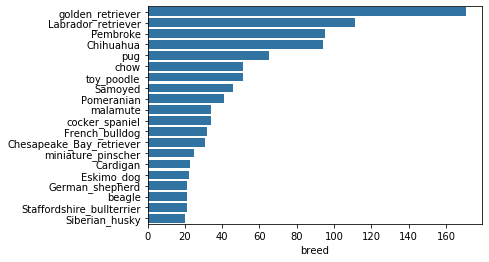

In [1108]:
ax = sns.barplot(x=topbreeds, y=topbreeds.index,
                color=base_color)

plt.savefig('TopTweetedBreeds.jpeg')

Top breeds by number of tweets

In [1054]:
breedfaves = dfdog[dfdog['breed'].isin(topbreeds.index)].groupby('breed')['favorite_count'].mean().sort_values(ascending=False)

In [1089]:
breedfaves

breed
French_bulldog               18820.433333
cocker_spaniel               12701.000000
Samoyed                      12660.707317
Eskimo_dog                   11938.818182
Cardigan                     11785.904762
golden_retriever             11628.346154
Labrador_retriever           10842.442308
Pembroke                     10367.393617
malamute                      9965.060606
German_shepherd               9507.523810
Chesapeake_Bay_retriever      9255.354839
chow                          8760.312500
Chihuahua                     8018.611111
miniature_pinscher            7611.083333
Staffordshire_bullterrier     7328.421053
Pomeranian                    7243.463415
Siberian_husky                6436.100000
toy_poodle                    6063.285714
pug                           5675.516129
beagle                        4028.850000
Name: favorite_count, dtype: float64

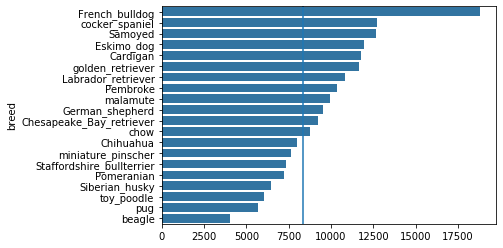

In [1107]:
ax = sns.barplot(y=breedfaves.index, x=breedfaves.values,
                color=base_color)

ax.axvline(dfdog['favorite_count'].mean())

plt.savefig('FaveBreeds.jpeg')

Top breeds based on number of favorites per tweet

In [1093]:
dfdog[dfdog['breed'] == 'French_bulldog'].sort_values(by='favorite_count', ascending=False)[['jpg_url','favorite_count']].head(3)

,jpg_url,favorite_count
1893,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,116991.0
1896,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,62399.0
647,https://pbs.twimg.com/media/Cn7gaHrWIAAZJMt.jpg,43244.0


In [1099]:
goodestdoggo = dfdog[dfdog['breed'].isin(topbreeds.index)].groupby('breed')['avescore'].mean().sort_values(ascending=False)

In [1101]:
goodestdoggo

breed
Samoyed                      11.717391
golden_retriever             11.614706
cocker_spaniel               11.470588
chow                         11.450980
Pembroke                     11.442105
Eskimo_dog                   11.409091
Siberian_husky               11.300000
French_bulldog               11.281250
Labrador_retriever           11.198198
Cardigan                     11.173913
toy_poodle                   11.019608
German_shepherd              11.000000
Pomeranian                   10.945122
malamute                     10.882353
Staffordshire_bullterrier    10.857143
Chesapeake_Bay_retriever     10.838710
Chihuahua                    10.595745
pug                          10.307692
beagle                       10.238095
miniature_pinscher           10.120000
Name: avescore, dtype: float64

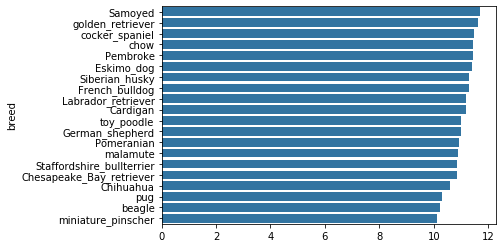

In [1109]:
ax = sns.barplot(y=goodestdoggo.index, x=goodestdoggo.values,
                color=base_color)

plt.savefig('GoodestDoggos.jpeg')

Land Clouds are the goodest doggos

Top breeds by average rating

In [1106]:
dfdog['avescore'].mean()

11.658108239882985

In [1104]:
dfdog.groupby(['dog_stage'])['avescore'].mean().sort_values(ascending=False)

dog_stage
floofer    12.666667
puppo      12.137931
doggo      11.675676
pupper     10.628333
Name: avescore, dtype: float64

Goodest stage based on average rating

In [1105]:
dfdog.groupby(['dog_stage'])['favorite_count'].mean().sort_values(ascending=False)

dog_stage
puppo      21925.629630
floofer    21100.666667
doggo      16601.071429
pupper      6642.959091
Name: favorite_count, dtype: float64

Favorite stage based on favorite count